# Objectives
- Describe a driving path using a belzier
    - I need to be able to randomly generate belzier curves
    - I can use the nature of belzier curves being envelopes of non-discrete lines to my advantedge. 
    - Instead of getting the envelope, I can work backwards to just take the distance formula at each point
- Interpolate the equation of that belzier
- Export the interpolated lines into a graph
- Turn the lines into relative movement instruction
- Translate the relative movement instruction into code


## Generating Test cases
Implemented the below formula to generate random length belzier curves
<img src="belzier_formula.jpg" />

In [63]:
import scipy.special
import random
scipy.special.binom(4, 2)
# Make a list with length n, with random points in the range [0,10]
import numpy as np
import matplotlib.pyplot as plt
size = random.randint(1, 10)
pointList = np.random.rand(size,2)*10
# t goes up to 1
interp = .01
def belzierPoint(pointList,t):
    x_i = 0
    y_i = 0
    n = len(pointList)
    # So then loop through the interpolate t from 0 to 1 by .1
    for i, point in enumerate(pointList):
        x_i += scipy.special.binom(n,i)*((1-t)**(n-i))*t**i*point[0]
        y_i += scipy.special.binom(n,i)*((1-t)**(n-i))*t**i*point[1]
    return x_i,y_i

def belzier(pointList, t = None):
    x,y = [],[]
    if t == None:
        for t in np.arange(0, 1+interp, interp):
            x_i,y_i = belzierPoint(pointList,t)
            x.append(x_i)
            y.append(y_i)
    return x,y
x,y = belzier(pointList)
print(pointList)


[[3.49387839 6.7425837 ]
 [1.30732308 6.36835399]]


## Generating line interpolation
The density of "t" is directly proportional to the amount of changes in the curve's area, so that can be used to implicitly apply the secant lines

In [64]:
linePoints =[]
lines = []
numLines = 10
lineInterp = 1/numLines
for i in np.arange(0, 1+lineInterp, lineInterp):
    x_i,y_i = belzierPoint(pointList,i)
    linePoints.append([x_i,y_i])
for i in range(len(linePoints)):
    if(i!=0):
        lines.append([linePoints[i-1],linePoints[i]])

print(linePoints)
print(lines[0])


[[3.4938783872690404, 6.742583697269656], [3.0653596479796645, 6.607796513794868], [2.6544255532597267, 6.353126844486265], [2.261076103109226, 5.978574689343842], [1.885311297528165, 5.484140048367602], [1.5271311365165419, 4.869822921557545], [1.1865356200743566, 4.1356233089136705], [0.8635247482016101, 3.2815412104359787], [0.5580985208983018, 2.3075766261244697], [0.27025693816443175, 1.2137295559791437], [0.0, 0.0]]
[[3.4938783872690404, 6.742583697269656], [3.0653596479796645, 6.607796513794868]]


## Similar Slope Merging
Some curves may still end up with two nearly continuous secant lines, so this code merges them if the slope is within 20%

In [65]:
def reduce():
    for i in range(len(lines)):
        if(i!=0 and i<len(lines)-1):
            slope1 = (lines[i-1][0][1]-lines[i-1][1][1])/(lines[i-1][0][0]-lines[i-1][1][0])
            slope2 = (lines[i][0][1]-lines[i][1][1])/(lines[i][0][0]-lines[i][1][0])
            avg = ((slope1+slope2)/2)
            percent_diff=abs(slope1-slope2)/avg
            if(abs(percent_diff)<.75):
                lines[i-1]=[lines[i-1][0],lines[i][1]]
                lines.pop(i)
                linePoints.pop(i)
                reduce()
reduce()
print(linePoints[1])
print(lines[0][1])
print(linePoints)

[1.5271311365165419, 4.869822921557545]
[1.5271311365165419, 4.869822921557545]
[[3.4938783872690404, 6.742583697269656], [1.5271311365165419, 4.869822921557545], [0.27025693816443175, 1.2137295559791437], [0.0, 0.0]]


## Making motion instructions
### ISSUES
- Need to figure out how to accurately describe the angle turning, as it seems off

In [66]:
import math
distances = []
angles= []
driveInstruction= []
for i in range(len(lines)+1):
    rotationType = 'O'
    x_dist = lines[i-1][1][0]-lines[i-1][0][0]
    y_dist = lines[i-1][1][1]-lines[i-1][0][1]
    if i!=0:
        distance = math.sqrt(x_dist**2+y_dist**2)        
        prevAngle = driveInstruction[-1][1]
        angle =  (math.atan2(y_dist,x_dist)*360)/(2*math.pi)
        # Subtract out 360 degrees if the angle is greater than 360 degrees
        if abs(angle)>360:
            angle = angle - 360*((angle)/abs(angle))*int(abs(angle)/360)
        if angle<0:
            angle = 360+angle
        if abs(angle-prevAngle)>30:
            rotationType = 'R'
        print(angle)
        
    else:
        angle = math.degrees(math.atan2(y_dist,x_dist))
        if angle<0:
            angle = 360+angle
        distance = linePoints[0]
    driveInstruction.append([distance,angle,rotationType])


223.59774921378622
251.02830134488704
257.4469360575476


## Graphing
Taking all the data currently calculated, and making it viewable

In [67]:
import math
extraPoints = []
omniPoints = []
rotationPoints=[]
for i in range(len(driveInstruction)):
    if i!=0:
        t1 = angl
        
        angl = math.radians(driveInstruction[i][1])
        position[0]+=driveInstruction[i][0]*math.cos(angl)
        position[1]+=driveInstruction[i][0]*math.sin(angl)
        extraPoints.append([position[0],position[1]])
        if driveInstruction[i][2]=='R':
            rotationPoints.append([position[0],position[1]])
        else:
            omniPoints.append([position[0],position[1]])
    else:
        position = [linePoints[0][0],linePoints[0][1]]
        extraPoints.append(driveInstruction[0][0])
        angl = math.radians(driveInstruction[0][1])

# Theres a omni turn, and a rotation turn

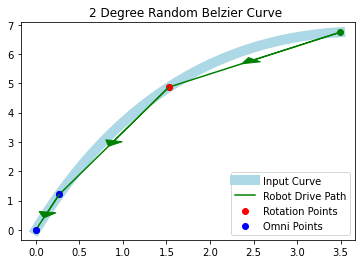

In [68]:
from matplotlib.widgets import Slider, Button, RadioButtons
plt.plot(x,y,label='Input Curve',linewidth=10,color= 'lightblue',zorder=1)

plt.title(str(size)+' Degree Random Belzier Curve ') 


x_l,y_l = zip(*extraPoints)
ax = plt.gca()
plt.scatter(x_l,y_l,color = 'g',zorder=2)
plt.plot(x_l,y_l,color = 'g',label = 'Robot Drive Path',zorder=2)

for i in range(len(linePoints)):
    if i<len(linePoints)-1:
        plt.arrow(x_l[i],y_l[i],(x_l[i+1]-x_l[i])/2,(y_l[i+1]-y_l[i])/2,head_width=0.2,head_length=0.2,color='g',zorder=3)


x_rotation,y_rotation = zip(*rotationPoints)
plt.scatter(x_rotation,y_rotation,color= 'r',label = 'Rotation Points',zorder = 3)

x_omni,y_omni = zip(*omniPoints)
plt.scatter(x_omni,y_omni,color= 'b',label = 'Omni Points',zorder = 3)

plt.legend()
plt.savefig('Driving Path.png',dpi = 100,facecolor='w', edgecolor='w',orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)


## Translating movement into Java
- Write the driveInstruct list into a basic textfile
- Later get that into java


In [69]:
f = open("drivingInstructions.txt", "w")
for i,instruction in enumerate(driveInstruction):
    if i==0:
        f.write(f'X{instruction[0][0]} Y{instruction[0][1]} R{instruction[1]}-{instruction[2]}')
    else:
        f.write(f'\nD{instruction[0]} R{instruction[1]}-{instruction[2]}')